Importing Libraries and Ingesting Data from CSV data containing taxi ride details:

In [84]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('dataset.csv')

In [86]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


Managing Different Datatypes and Writing custom Functions:

In [87]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object

'tpep_pickup_datetime' and 'tpep_dropoff_datetime' have 'object' as their datatype, even though they contain the pick-up and drop time timestamps. To get meaningful data out of it, we have to convert it to the 'datetime' datatype and calculate the total duration of the taxi ride:

In [88]:
def calculate_travel_time(df):
    df['travel_time'] = ((pd.to_datetime(df['tpep_dropoff_datetime']) - pd.to_datetime(df['tpep_pickup_datetime'])).dt.seconds) / 60
    df = df.drop(columns=['tpep_dropoff_datetime', 'tpep_pickup_datetime'])
    return df

In [89]:
df = calculate_travel_time(df)

In [90]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,travel_time
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,1394.400000
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,1376.566667
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,53.650000
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,56.866667
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,18.833333


Data Wrangling by handling Null values:

In [91]:
df.isnull().sum()

VendorID                    0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
travel_time                 0
dtype: int64

Replace missing or unknown values with the most frequent category for categorical values (Considering ID values as categorical):

In [92]:
freq1 = df['store_and_fwd_flag'].value_counts()
most_freq1 = freq1[freq1 == freq1.max()].index
max_val1 = most_freq1[0]
df['store_and_fwd_flag'].fillna(max_val1, inplace=True)
freq2 = df['RatecodeID'].value_counts()
most_freq2 = freq2[freq2 == freq2.max()].index
max_val2 = most_freq2[0]
df['RatecodeID'].fillna(max_val2, inplace=True)

Imputing null values with mean of the numerical columns:

In [93]:
cols = ['passenger_count', 'congestion_surcharge', 'Airport_fee']
imputer = SimpleImputer(strategy='mean')
df[cols] = imputer.fit_transform(df[cols])

In [94]:
df.isna().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
extra                    0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
travel_time              0
dtype: int64

Function to visualize categorical and numerical data seperately:

In [95]:
num = ['passenger_count','trip_distance','extra','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee','travel_time']
cat = ['VendorID','RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','payment_type']

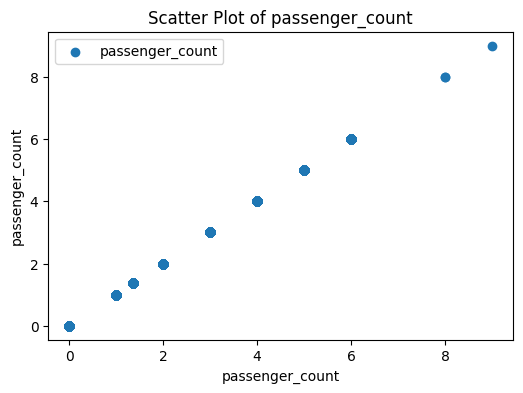

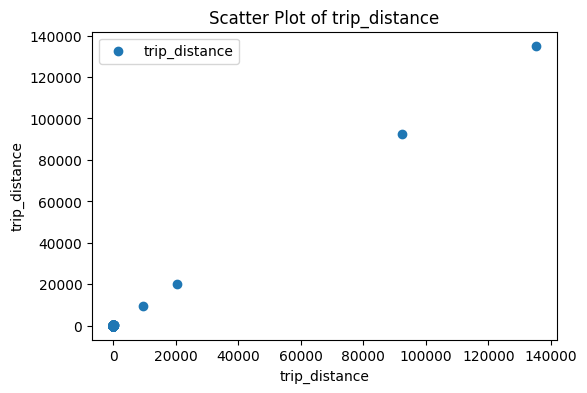

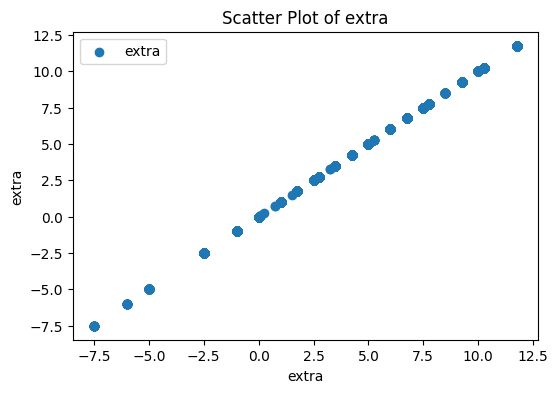

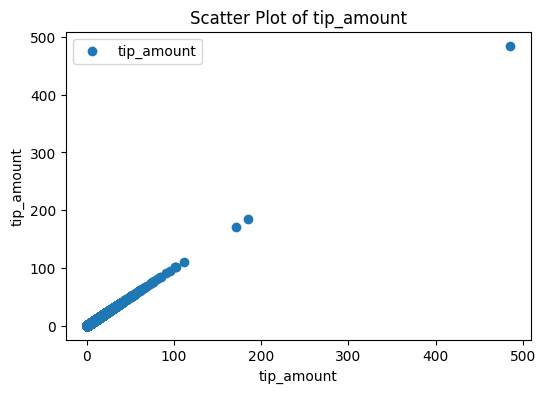

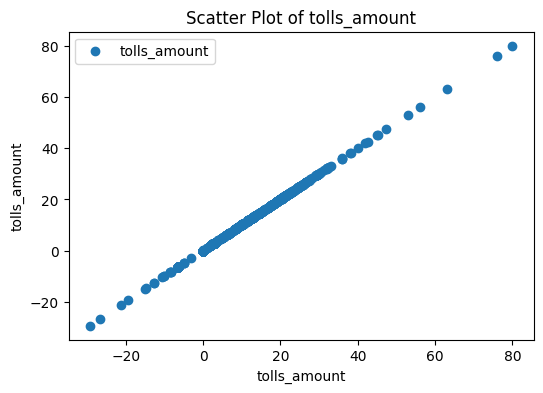

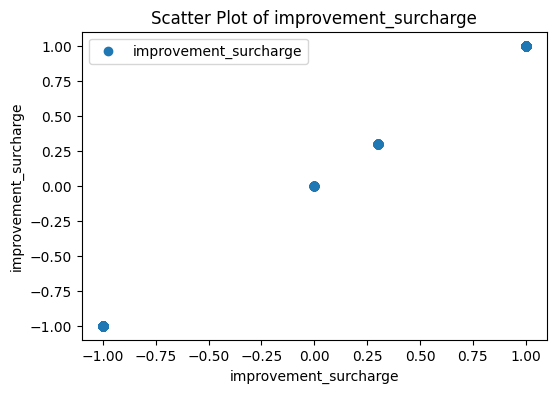

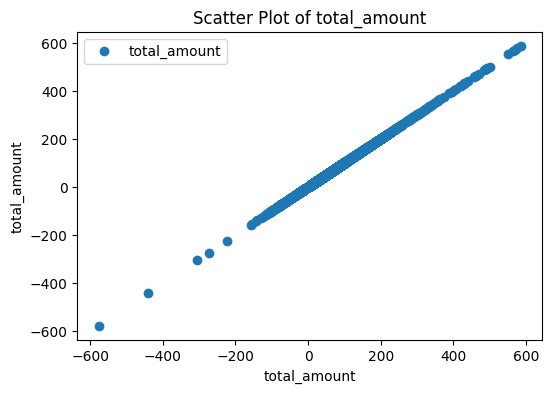

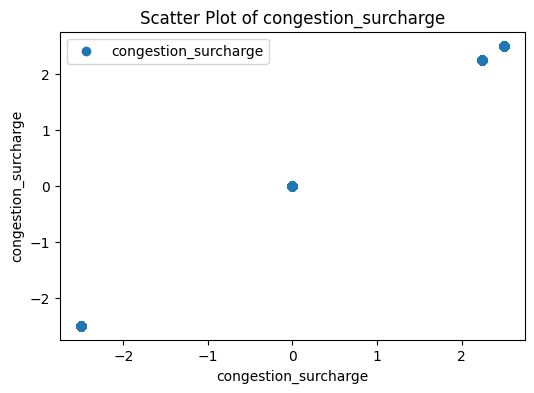

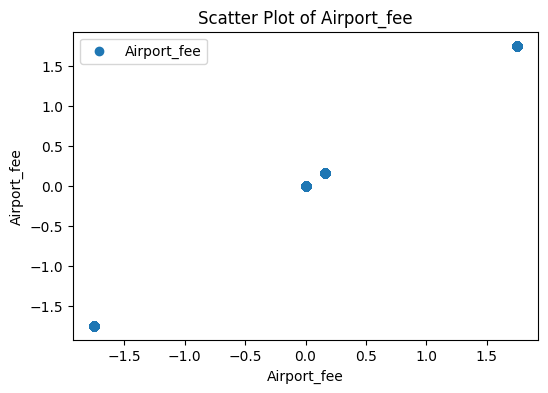

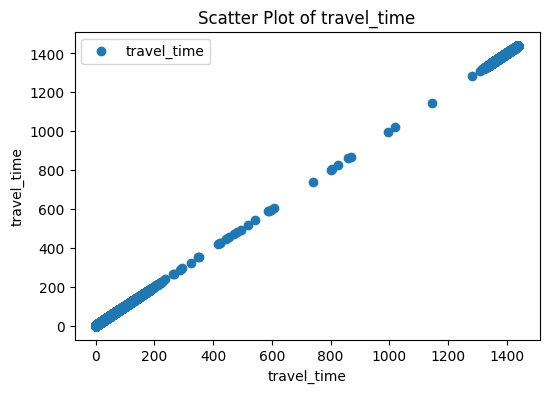

In [96]:
for feature in num:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df[feature], label=feature)
    plt.title(f'Scatter Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel(feature)
    plt.legend()
    plt.show()

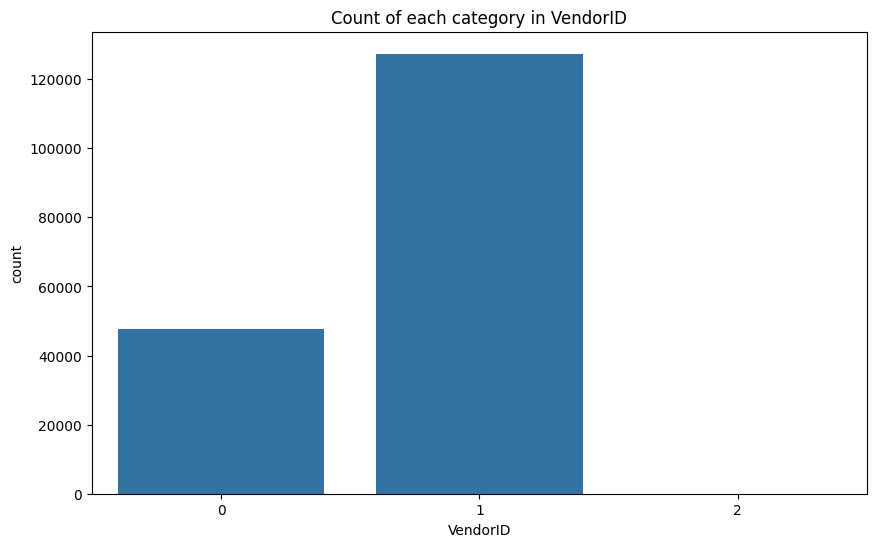

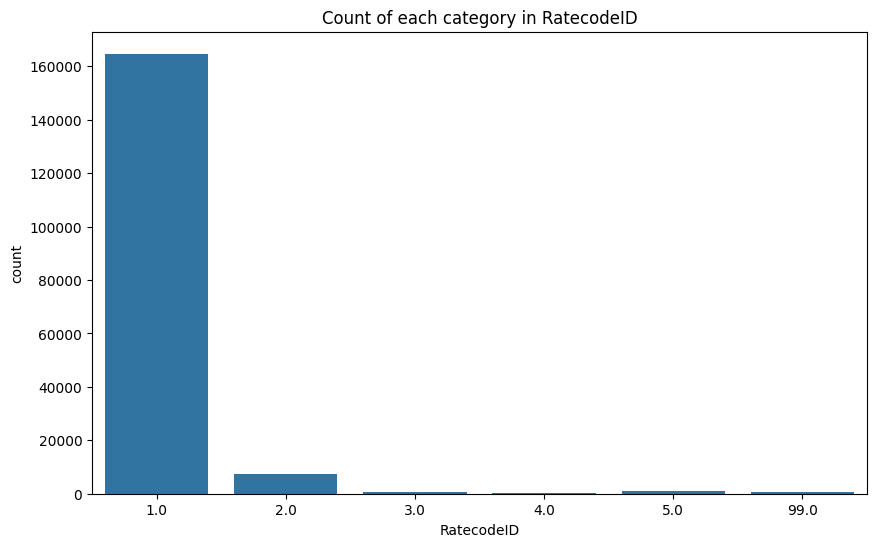

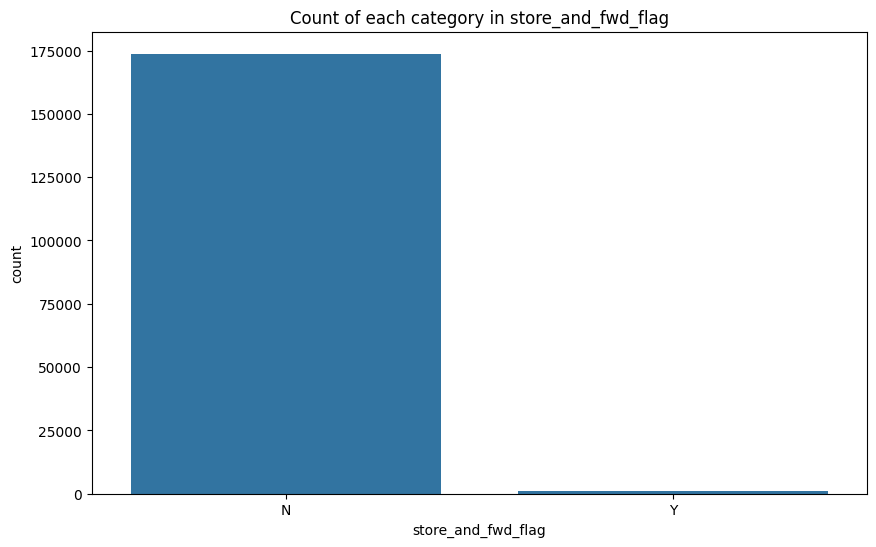

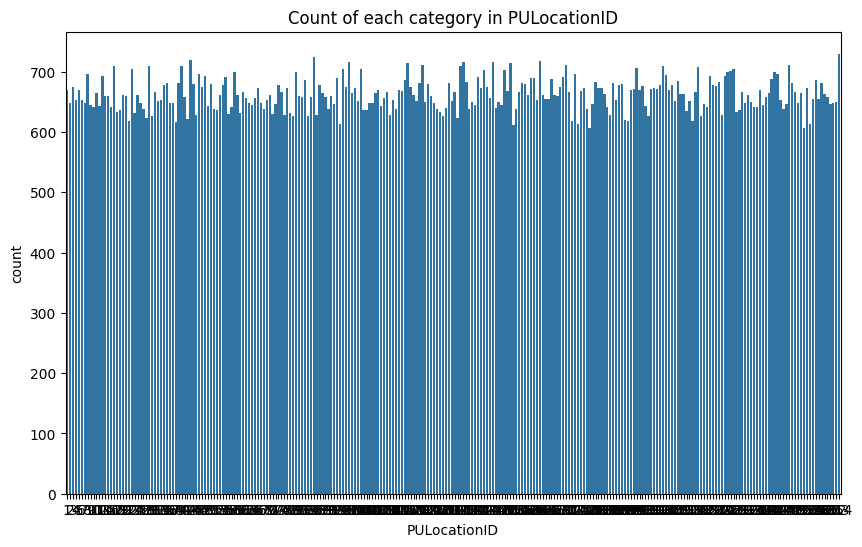

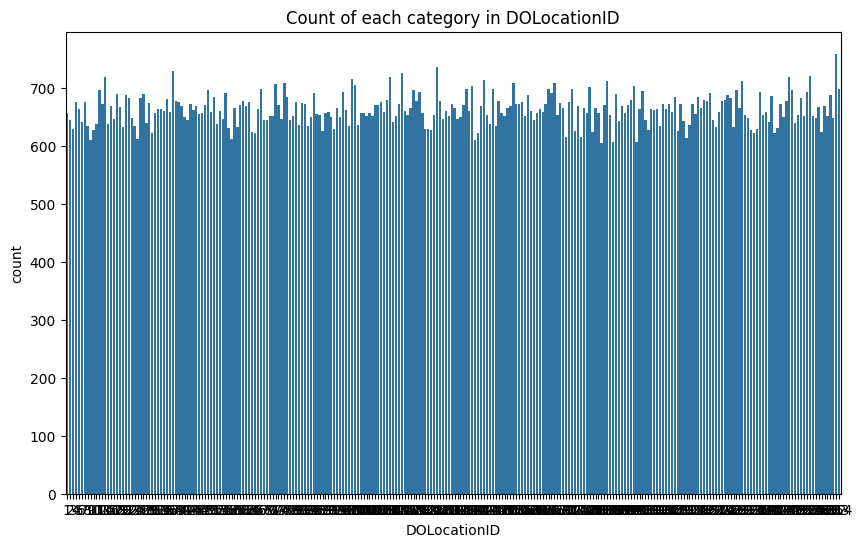

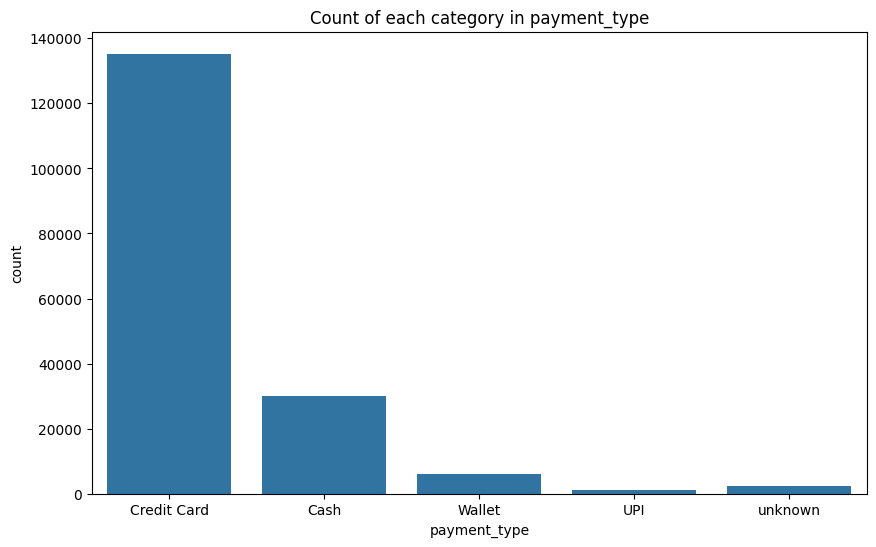

In [97]:
cat_df = df[cat]
for column in cat_df.columns:
  plt.figure(figsize=(10, 6))
  sns.countplot(x=column, data=cat_df)
  plt.title(f'Count of each category in {column}')
  plt.show()